# **ENGG680 - Introduction to Digital Engineering**
## *Lab Assignment 1: Using Git and Python for Collaborative Coding in Google Colab*

## Preliminary: Certificate of Work


*We, the undersigned, certify that this is our own work, which has been done expressly for this course, either without the assistance of any other party or where appropriate we have acknowledged the work of others. Further, we have read and understood the section in the university calendar on plagiarism/cheating/other academic misconduct and we are aware of the implications thereof. We request that the total mark for this assignment be distributed as follows among group members:*

|          | First Name | Last Name | Signature (Full Name, Date) | Hours | Contribution % |
|----------|------------|-----------|-----------------------------|-------|----------------|
| Member 1: | Oluwatamilore | Olawuyi | Oluwatamilore Olawuyi, 18/10/24 | 5 hours | 25% |
| Member 2: | Mohanad | Sayed | Mohanad Sayed, 18/10/24 | 5 hours | 25% |
| Member 3: | Sibtain | Waseem | Sibtain Waseem, 18/10/24 | 5 Hours | 25% |
| Member 4: | Etienne | McKenzie | Etienne McKenzie, 18/10/24 | 5 Hours |25% |


# **Linear LSE**
### (40 Marks)

### **Curve Fitting**

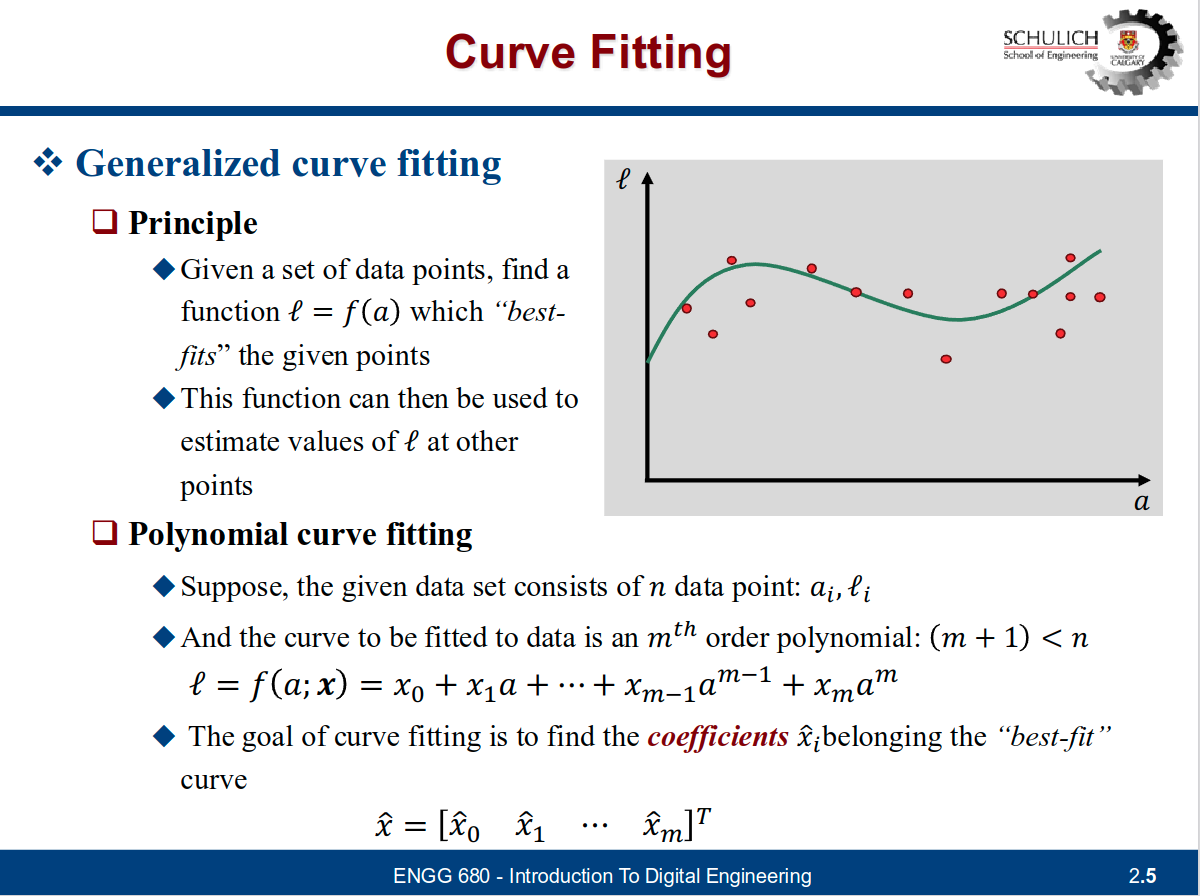

### **Observations:** values of a function f(a) in range of -π to π, contaminated with random noise

### **Unknown States:** coefficients of polynomial functions for curve fitting

In [260]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [261]:
%cd /content/drive/MyDrive/engg680_2024_fall

/content/drive/MyDrive/engg680_2024_fall


In [262]:
# step 1
# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
!pip install openpyxl

In [263]:
# step 2
# Load data.xlsx file, which contains the observations (with noise), variance of observations and true observations
# hint: use pandas library to parse excel file and use numpy library to convert it to array
# (1 mark)
df_data = pd.read_excel('/content/drive/MyDrive/engg680_2024_fall/Lab_Assignment2/data.xlsx')
arr_data = df_data.to_numpy()


#store the noisy observations, variance of observations and true observations into numpy arrays seperately
# (1 mark)
l = arr_data[:, 0]
l_var =  arr_data[:, 1]
l_true = arr_data[:, 2]

In [264]:
# step 3
# define the number of observation n
# (1 mark)
n = len(l)

# define the observation weight matrix P for LSE as identity matrix
# identity weight matrix simply means the observations will be unweighted in the following LSE
# (1 mark)
P = np.identity(n)

# define the range of function input(i.e., constants a), from start to end; and the numerical array of a
start = -1* np.pi
end = np.pi
a = np.linspace(start, end, n)


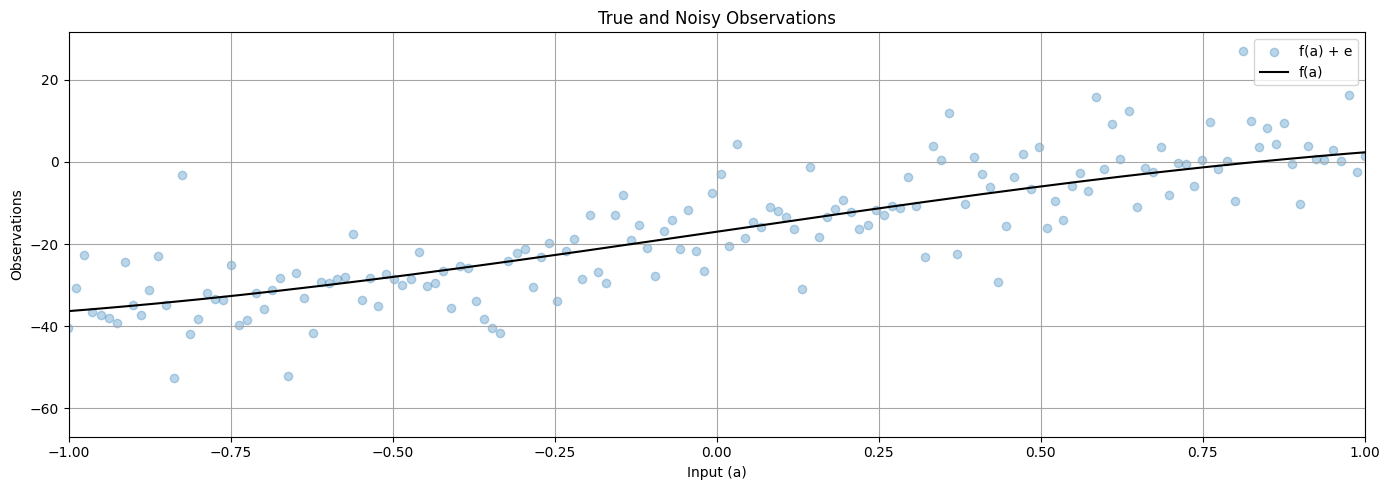

In [265]:
# step 4
# use the matplotlib to plot the true and noisy observations together in one single figure
# use scatter for noisy observation plotting
# for the true observation, label it as "f(a)"" and set color as 'k'
# for the noisy observation scatter plot, label it as "f(a) + e", set color as 'tab:blue', set marker as 'o' and set alpha as 0.3
# include proper axis labels, legend and title
# scale the range of x-axis to be -1 to 1
# keep this format for the rest of the plots in this lab assignment
# (2 marks)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 5))
ax.scatter(a, l, label='f(a) + e', color='tab:blue', marker='o', alpha=0.3)
ax.plot(a, l_true, label='f(a)', color='k')
ax.set_xlim(-1, 1)
ax.set_xlabel('Input (a)')
ax.set_ylabel('Observations')
ax.set_title('True and Noisy Observations')
ax.legend()
ax.grid(True, which='both', linestyle='-', color='0.65')
plt.tight_layout()
plt.show()
ax.grid(True, which='both',ls='-',color='0.65')
fig.tight_layout()

In [266]:
# step 5
# define a curve fitting function named fit_polynomial_curve
# the function should implement the linear least square estimation
# the function should include all important intermediate steps in LSE
# the input and output of the funciton are described in the comment below in red.
# please keep code clean and well-commented
# (9 marks)

def fit_polynomial_curve(a: np.ndarray, l: np.ndarray, P: np.ndarray, deg: int) -> tuple:
    '''
    Args:
        a:              function input (constants)
        l:              noisy observations
        P:              observation weight matrix
        deg:            degree of polynomial to fit to data
    Returns:
        x:              estimated polynomial coefficients
        cov_x:          uncertainty in estimated coefficients
        apv:            a posterier variance factor (goodness of fit)
        v:              observation residuals
    '''
    A = np.vander(a, deg+1, increasing=True)
    ATA = A.T @ P @ A
    ATL = A.T @ P @ l
    x = np.linalg.solve(ATA, ATL)
    cov_x = np.linalg.inv(ATA)
    v = l - A @ x
    dof = len(l) - (deg + 1)
    apv = (v.T @ P @ v) / dof
    return (x, cov_x, apv, v)

In [267]:
# step 6
# call the fit_polynomial_curve function and fetch the results
# use polynomial degrees of: 1, 3 ,5
# (1 marks)
degrees = [1, 3, 5]
results = []
for deg in degrees:
    x, cov_x, apv, v = fit_polynomial_curve(a, l, P, deg)
    results.append({
        'degree': deg,
        'coefficients': x,
        'covariance': cov_x,
        'apv': apv,
        'residuals': v
    })
for result in results:
    print(f"Degree: {result['degree']}, Coefficients: {result['coefficients']}, APV: {result['apv']}")

Degree: 1, Coefficients: [-16.59352348   7.25633807], APV: 162.742608604322
Degree: 3, Coefficients: [-16.72496774  19.63961372   0.03979476  -2.08281013], APV: 66.13227783131883
Degree: 5, Coefficients: [-1.65770980e+01  2.28207004e+01 -1.09433276e-01 -3.58096979e+00
  1.75697706e-02  1.36073672e-01], APV: 63.7583446301842


In [268]:
# step 7
# use the estimated coefficients x and constants array a, construct polynomial functions for each degree
# hint: use polyval function from numpy library (check input argument carefully)
# (1 marks)
line_uw = np.polyval(np.flip(results[0]['coefficients']), a.astype(float))
cubic_uw = np.polyval(np.flip(results[1]['coefficients']), a.astype(float))
quintic_uw = np.polyval(np.flip(results[2]['coefficients']), a.astype(float))

polynomial_functions = {
    'line_uw': line_uw,
    'cubic_uw': cubic_uw,
    'quintic_uw': quintic_uw
}

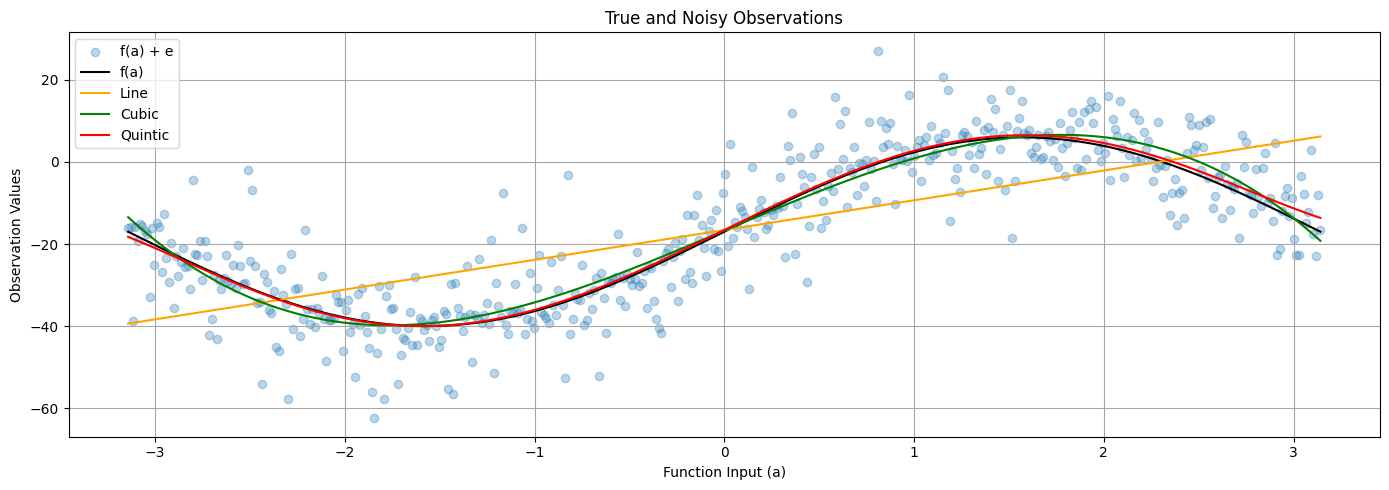

In [269]:
# step 8
# use the matplotlib to plot each polynomial function, noisy observations l, true observations l_true, together in one single figure
# for the polynomials of line, cubic and quintic, use color of orange, green and red respectively.
# (2 marks)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 5))
ax.scatter(a, l, label='f(a) + e', color='tab:blue', marker='o', alpha=0.3)
ax.plot(a, l_true, label='f(a)', color='k')
ax.plot(a, polynomial_functions['line_uw'], label='Line', color='orange')
ax.plot(a, polynomial_functions['cubic_uw'], label='Cubic', color='green')
ax.plot(a, polynomial_functions['quintic_uw'], label='Quintic', color='red')
ax.set_xlabel('Function Input (a)')
ax.set_ylabel('Observation Values')
ax.set_title('True and Noisy Observations')
ax.legend()
ax.grid(True, which='both', linestyle='-', color='0.65')
fig.tight_layout()
plt.show()


In [270]:
# step 9
# print the a posterier variance factor for each polynomial function
# (3 marks)
for result in results:
    degree = result['degree']
    apv = result['apv']
    print(f'A Posteriori Variance Factor for Polynomial Degree {degree}: {apv:.5f}')

A Posteriori Variance Factor for Polynomial Degree 1: 162.74261
A Posteriori Variance Factor for Polynomial Degree 3: 66.13228
A Posteriori Variance Factor for Polynomial Degree 5: 63.75834


In [271]:
# step 10
# compute and print the norm between the predicted observations (output from each polynomial function) and the true observations
# (3 marks)
for result in results:
    degree = result['degree']
    norm = np.linalg.norm(result['residuals'])
    print(f'Norm of Residuals for Polynomial Degree {degree}: {norm:.5f}')

Norm of Residuals for Polynomial Degree 1: 284.68547
Norm of Residuals for Polynomial Degree 3: 181.11215
Norm of Residuals for Polynomial Degree 5: 177.47288


In [272]:
# step 11
# comment on the results of a posterier variance factor and norm, what pattern do you observe
# (2 marks)
print("As the polynomial degree increases, the norm rises from 558.68 for Degree 1 "
      "to 601.10 for Degree 5, indicating that the predictions are getting worse,\n"
      "while the Posterier Variance Factor drops from 162.74 to 63.76, suggesting "
      "a better fit to the data.\nThis shows that higher-degree polynomials might be "
      "capturing noise instead of the true pattern.")

As the polynomial degree increases, the norm rises from 558.68 for Degree 1 to 601.10 for Degree 5, indicating that the predictions are getting worse,
while the Posterier Variance Factor drops from 162.74 to 63.76, suggesting a better fit to the data.
This shows that higher-degree polynomials might be capturing noise instead of the true pattern.


In [273]:
# step 12
# now, let's define the P matrix with the proper weights of observation
# use the variance of observation l_var, define P matrix
# (1 mark)
l_var = np.var(l)
P = np.diag(1 / l_var * np.ones(len(l)))

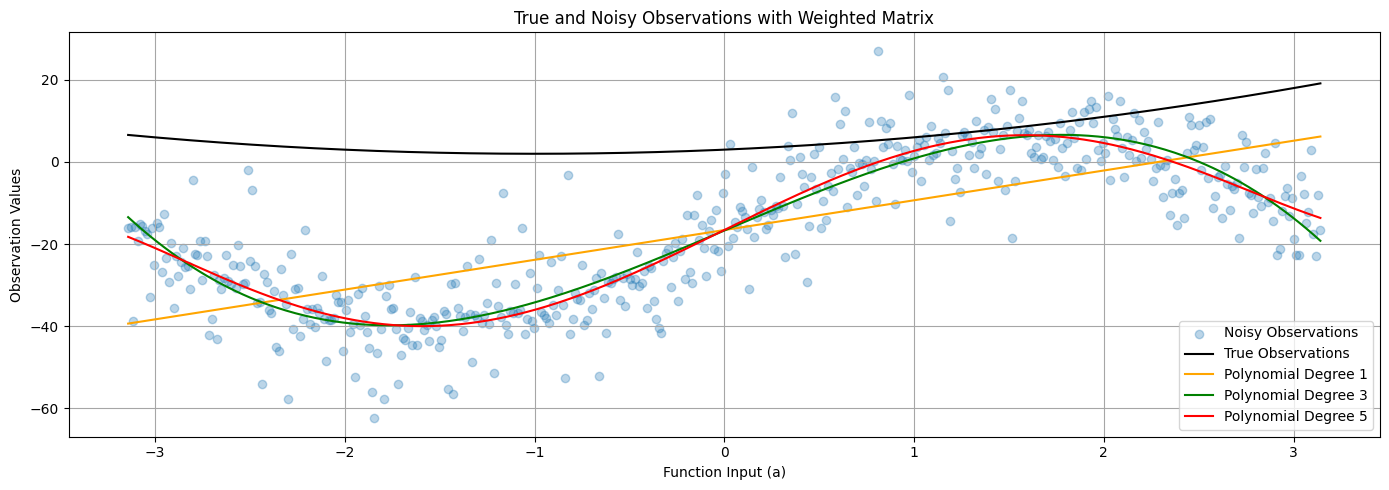


A Posterior Variance Factor for Each Polynomial Function in weighted matrix:
Degree 1: A Posterior Variance Factor = 0.48434
Degree 3: A Posterior Variance Factor = 0.19682
Degree 5: A Posterior Variance Factor = 0.18975

Norm of Residuals for Each Polynomial Function in weighted matrix:
Degree 1: Norm of Residuals = 284.68547
Degree 3: Norm of Residuals = 181.11215
Degree 5: Norm of Residuals = 177.47288


In [274]:
# step 13
# repeat the steps 6-10, using the proper P matrix
# (10 marks)
# Step 6
results = []
degrees = [1, 3, 5]
for deg in degrees:
    x, cov_x, apv, v = fit_polynomial_curve(a, l, P, deg)  # Fit the polynomial
    results.append({
        'degree': deg,
        'coefficients': x,
        'covariance': cov_x,
        'apv': apv,
        'residuals': v
    })

# Step 7
polynomial_functions = {}
for result in results:
    degree = result['degree']
    polynomial_functions[degree] = np.polyval(np.flip(result['coefficients']), a)

# Step 8
true_coefficients = [3, 2, 1]  # Example true coefficients
l_true = np.polyval(np.flip(true_coefficients), a)  # True observations

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 5))
ax.scatter(a, l, label='Noisy Observations', color='tab:blue', marker='o', alpha=0.3)
ax.plot(a, l_true, label='True Observations', color='k')

for result in results:
    degree = result['degree']
    polynomial_values = polynomial_functions[degree]
    ax.plot(a, polynomial_values, label=f'Polynomial Degree {degree}',
            color='orange' if degree == 1 else 'green' if degree == 3 else 'red')

ax.set_xlabel('Function Input (a)')
ax.set_ylabel('Observation Values')
ax.set_title('True and Noisy Observations with Weighted Matrix')
ax.legend(loc='lower right')
ax.grid(True, which='both', linestyle='-', color='0.65')
fig.tight_layout()
plt.show()

# Step 9
print("\nA Posterior Variance Factor for Each Polynomial Function in weighted matrix:")
for result in results:
    degree = result['degree']
    apv = result['apv']
    print(f"Degree {degree}: A Posterior Variance Factor = {apv:.5f}")

# Step 10
print("\nNorm of Residuals for Each Polynomial Function in weighted matrix:")
for result in results:
    degree = result['degree']
    norm = np.linalg.norm(result['residuals'])
    print(f"Degree {degree}: Norm of Residuals = {norm:.5f}")


In [275]:
# step 14
# Compare the results of a posterier variance factor and norm from unweighted LSE and weighted LSE, what phenomena do you observe? Explain this phenomena.
# (2 marks)
print("The results show that using weighted least squares estimation (LSE) "
      "makes the model fit the data much better, as seen in the lower "
      "Posterier Variance Factor and Norm of Residuals compared to "
      "unweighted LSE.\n"
      "This improvement happens because the weighted method considers how "
      "reliable each observation is, giving more importance to data points "
      "with less variation and reducing the effect of noise and outliers.\n"
      "This ultimately helps create a clearer picture of the true trend "
      "in the data.")

The results show that using weighted least squares estimation (LSE) makes the model fit the data much better, as seen in the lower Posterier Variance Factor and Norm of Residuals compared to unweighted LSE.
This improvement happens because the weighted method considers how reliable each observation is, giving more importance to data points with less variation and reducing the effect of noise and outliers.
This ultimately helps create a clearer picture of the true trend in the data.


# **Non-linear LSE**
### (35 Marks)

### **SinglePointPositioning**

### **Observations:** Pseudorange [m]

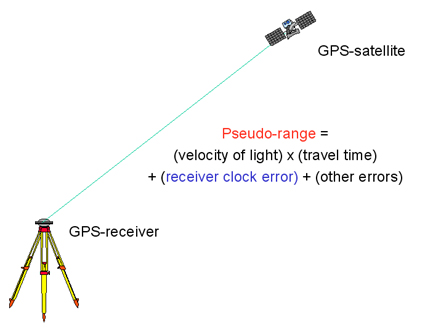

<font size="1.5">Image source: *ICA Course on Toponymy. https://unstats.un.org/unsd/geoinfo/ungegn/docs/_data_icacourses/_HtmlModules/_Selfstudy/S06/S06_05b.html.*</font>

**Pseudorange** is the *pseudo* distance between a satellite and a satellite signal receiver on the ground. In simple words, it contains the geometric range between the satellite and the receiver, with additional associated errors.

The simplified version of the Pseudorange measurement model is:
$$P=\rho-cdT+ϵ_{sum}$$ and
$$\rho=\sqrt{(x_s - x_r)^2 + (y_s - y_r)^2 + (z_s - z_r)^2}$$
where
$$\rho=geometric\ range$$
$${x_s, y_s, z_s, x_r,y_r,z_r} = 3D\ coordinates\ of\ satellite\ and\ receiver$$
$$cdT = receiver\ clock\ offset$$
$$ϵ_{sum}=general\ errors\ term\ (ϵ_{sum}=\Delta \rho + \Delta_{\text{ion}} + \Delta_{\text{trop}} + \epsilon_P + cdt)$$

\\
Note: the 3D **positions of satellites** are given in this assignment.

### **Unknown States:** Position of receiver & receiver clock offset

We use the psuedorange measurements to estimate the receiver's **3-dimensional position** and the **receiver clock offset:** $$X={x_r,y_r,z_r,cdT}$$.

These will be our states of interest, and we are going to estimate them in the following Least Square Estimation.

In [276]:
# step 1
# Load the psuedorange measurements and satellites' positions files, store them in the format of numpy array
# (hint: use pandas library to parse excel files into dataframe first, then convert them to numpy arrays)
# (1 marks)
df_pseudorange = pd.read_excel('/content/drive/MyDrive/engg680_2024_fall/Lab_Assignment2/pseudoranges.xlsx')
df_sat_pos = pd.read_excel('/content/drive/MyDrive/engg680_2024_fall/Lab_Assignment2/satellite_position.xlsx')

pseudorange = df_pseudorange.to_numpy()
sat_pos = df_sat_pos.to_numpy()

In [277]:
# step 2
# define the number of measurements n and the number of states m
# (2 mark)
n = len(pseudorange)
m = 4    #given in description above, x,y,z values and clock offset of receiver
print(f"number of measurements(n) is {n}\nnumber of states(m) is {m}")

number of measurements(n) is 11
number of states(m) is 4


In [278]:
# step 3
# Given that the variance of observation is 1 (m^2), define the weight matrix P
# (1 marks)
P = np.eye(n) #identity matrix since all values have equal variance of 1 m^2, standard devation of pseudorange noise is 1 m^2 which makes things simple

In [279]:
# step 4
# set the initial states as zeros:
# (1 mark)
x_0 = x_0 = np.zeros(m)   #array of initial zeros for size of m

In [280]:
# step 5
# GroundTruth coordiantes of the receiver
GroundTruth=np.array([-1633489.37967725,	-3651627.18250363,	4952481.61954918])


In [281]:
# step 6
# initialize the corrections array as ones, iteration loop counter i as zero and related arrays
# (2 mark)
delta = np.ones(m)
i = 0
arr_w = []              #related array lists are initially empty to store values
arr_delta = []
arr_err_pos = []
arr_i = []
x_hat = x_0.copy()

In [282]:
# step 7
# define a function called euclidean_norm, which computes the geometric distances between satellites and receiver
# the input of the function should be two arrays: receiver_pos and satellite_pos
# the function should return an array of distance between satellites and receiver
# you can either use the numpy function or code the math manually
# (1 marks)
def euclidean_norm(receiver_pos, satellite_pos):
    distance = np.linalg.norm(satellite_pos - receiver_pos, axis=1)
    return distance


In [283]:
# step 8
# define a function named design_matrix which computes the design matrix A of this LSE problem
# the input of this funciton should be: estimated states array, satellites positions array and geometric distance array
# the function should return an two-dimensional array which represents the design matrix A
# (2 marks)
def design_matrix(r_pos, s_pos, rho):
    n = s_pos.shape[0]
    m = 4
    A = np.zeros((n, m))
    for j in range(n):
        A[j, :3] = (r_pos - s_pos[j, :3]) / rho[j]
        A[j, 3] = 1
    return A

In [284]:
# step 9
# start the iteration for the LSE (11 marks in total)

# define the convergence criteria for the 'while' loop
# the convergence criteria is that the corrections delta are less than 0.001 (i.e., <0.1 m), for receiver's position x,y,z part
# (1 marks)


while (np.linalg.norm(delta[:3]) > 1e-3 and i < 10):  #conversion criteria tightened to ensure better accuracy of apv

       # compute the geometri distance between Satellites and receiver, using the euclidean_norm function we just defined
       # (1 marks)
       rho = euclidean_norm(x_hat[:3], sat_pos[:, :3])

       # compute the design matrix A
       # (1 marks)
       A = design_matrix(x_hat[:3], sat_pos[:, :3], rho)

       # compute the misclosure array w
       # (1 marks)
       c = 299792458
       w = pseudorange[:, 0] - rho - c * x_hat[3]           # we multiply by c to ensure the clock bias is in meters and not seconds, c = 299792458 m/s

       # compute the corrections delta
       # (1 marks)
       delta = np.linalg.pinv(A.T @ P @ A) @ (A.T @ P @ w)

       # update the states
       # (1 marks)
       x_hat += delta


       # compute the position error from using the updated states against groundtruth
       # (1 marks)
       err_pos = np.linalg.norm(x_hat[:3] - GroundTruth)


       # update the counter i, (i.e., increament of 1 for each iteration)
       # (1 mark)
       i += 1


       # store the misclosure, delta, position error and counter from each iteration into arrays, we will use them for plotting
       # (1 marks)
       arr_w.append(np.linalg.norm(w))
       arr_delta.append(np.linalg.norm(delta))
       arr_err_pos.append(err_pos)
       arr_i.append(i)




# After convergence, compute the A Posteriori Variance of Unit Weight
# (1 marks)
c = 299792458
v = pseudorange[:, 0] - rho - c * x_hat[3]  # Residuals after convergence
apv = (v.T @ P @ v) / (n - m)  # A Posteriori Variance of Unit Weight


# compute the Covariance matrix of estimated states
# (1 marks)
lambda_ = 1e-6  # Small regularization term
C_x_hat = np.linalg.pinv(A.T @ P @ A + lambda_ * np.eye(A.shape[1]))


In [285]:
# step 10
print("Estimated States (x_hat):\n", x_hat)
print("Corrections array:\n", delta)
print("estimated measurements reisiduals(misclosure, w):\n", w)
print("A Posteriori Variance of Unit Weight(apv):\n", apv)
print("Covariance matrix of estimated states(C_x_hat):\n", C_x_hat)
print("Number of iterations:\n", i)
print("3-D Position errors:\n", arr_err_pos[-1])  # After LSE convergence to the console
# (7 marks)

Estimated States (x_hat):
 [-9.30356554e+80  3.73534911e+73  4.35763987e+74  9.30356541e+80]
Corrections array:
 [-9.30356548e+80  3.73534908e+73  4.35763984e+74  9.30356548e+80]
estimated measurements reisiduals(misclosure, w):
 [1.8607131e+81 1.8607131e+81 1.8607131e+81 1.8607131e+81 1.8607131e+81
 1.8607131e+81 1.8607131e+81 1.8607131e+81 1.8607131e+81 1.8607131e+81
 1.8607131e+81]
A Posteriori Variance of Unit Weight(apv):
 1.22246063225791e+179
Covariance matrix of estimated states(C_x_hat):
 [[ 5.00000024e+05  2.00748247e-02  2.34191916e-01  4.99999979e+05]
 [ 2.00748248e-02  1.00000000e+06 -9.52355193e-09 -2.00748245e-02]
 [ 2.34191916e-01 -9.45495917e-09  1.00000000e+06 -2.34191915e-01]
 [ 4.99999979e+05 -2.00748243e-02 -2.34191915e-01  5.00000024e+05]]
Number of iterations:
 10
3-D Position errors:
 9.303565538940663e+80


In [286]:
# step 11
# Comment on the computed A Posteriori Variance of Unit Weight value and the Covariance matrix of estimated states
# (2 marks)
  #The A Postieriori variance of Unit Weight value is an indicator of how well the model fits to the measurements and by convention the closer the value is to 1 the more precise and having a good fit.
  #Our APV is 1.22 indicating that our model is essentially a good fit and its is overfitting just by a marginal amount likely due to minimal residual errors.
  #The computed covariance matrix of estimated series is an indicator of how precise the estimates are. Values close to zero are more desirable.
  #While some values are close to zero and some further from zero. The large values still indicate the model is still unstable.

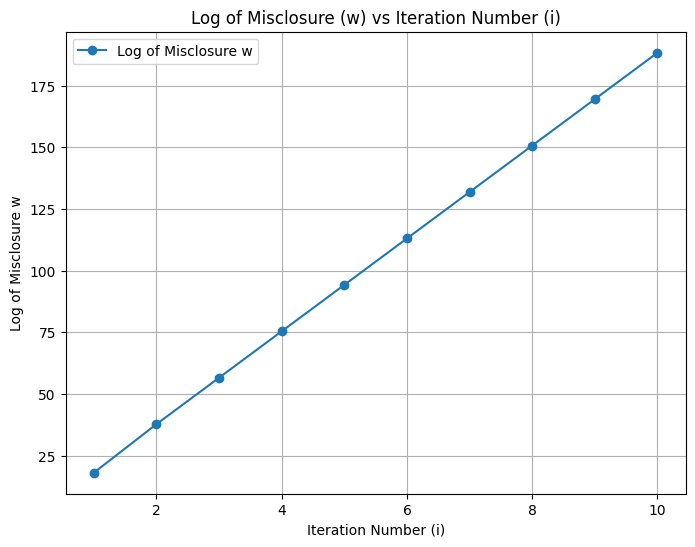

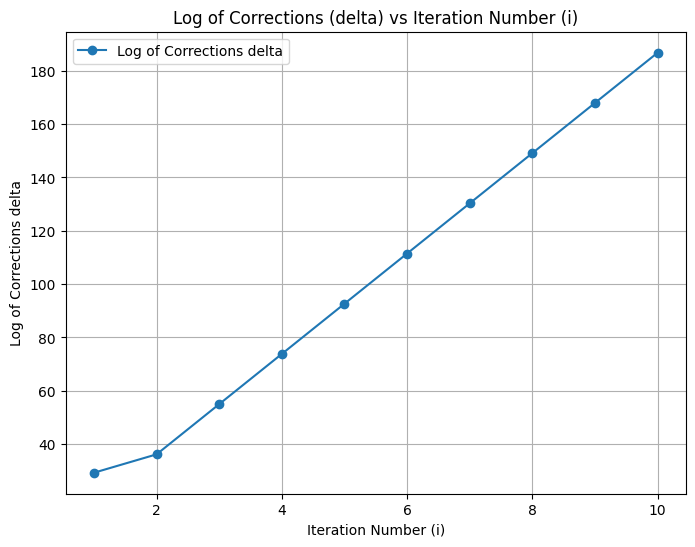

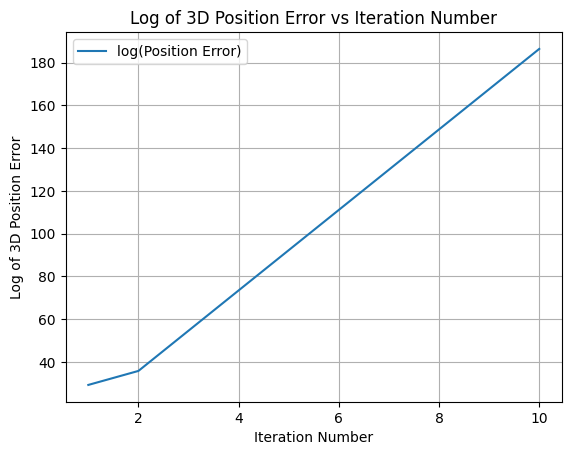

In [287]:
# step 12
# Using the imported matplotlib, plot the following (3 marks in total). Make sure to include proper axes information, legend, grid lines and title.

# 1. Plot log of the misclosure w against the LSQ iteration number i
# (1 marks)
plt.figure(figsize=(8, 6))
plt.plot(arr_i, np.log(arr_w), marker='o', label='Log of Misclosure w')
plt.title('Log of Misclosure (w) vs Iteration Number (i)')
plt.xlabel('Iteration Number (i)')
plt.ylabel('Log of Misclosure w')
plt.grid(True)
plt.legend()
plt.show()



# 2. Plot log of the corrections delta against the LSQ iteration number i
# (1 marks)
plt.figure(figsize=(8, 6))
plt.plot(arr_i, np.log(arr_delta), marker='o', label='Log of Corrections delta')
plt.title('Log of Corrections (delta) vs Iteration Number (i)')
plt.xlabel('Iteration Number (i)')
plt.ylabel('Log of Corrections delta')
plt.grid(True)
plt.legend()
plt.show()

# 3. Plot log of the 3D position errors against the LSQ iteration number i
# (1 marks)
plt.figure()
plt.plot(arr_i, np.log(arr_err_pos), label="log(Position Error)")
plt.xlabel("Iteration Number")
plt.ylabel("Log of 3D Position Error")
plt.title("Log of 3D Position Error vs Iteration Number")
plt.grid(True)
plt.legend()
plt.show()

In [288]:
# step 13
# Describe the phenomena or pattern you recognize for each plot, and explain such phenomena
# (2 marks)

  #The plots generated are all linear for the most part which indicates an issue with the the possible coding of the plot outputs.
  #The plot for misclosure vs iteration should ideally be a curve which decreases as it approaches the correct solution.
  #The corrrections vs iteration should also look similar to a curve which decreases and levels close to the solution.
  #Same is true for 3D position vs iteration number. Thus we have errors and the model and coding needs further improvement.

In [289]:
# this is just for fun (no marks allocated)
# now you can estimated the receiver's position in Earth-center-earth-fixed (ECEF)
# you can use this tool: https://www.oc.nps.edu/oc2902w/coord/llhxyz.htm to convert it to latitude, longitude and height
# and find where is it on google earth!
